# Introduction
In the tutorial, we saw how to build deep neural networks by stacking layers inside a Sequential model. By adding an activation function after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.

In these exercises, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU. 

In [3]:
import pandas as pd

df= pd.read_csv("C:/Users/HP/Downloads/concrete.csv")
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# 2) Define a Model with Hidden Layers
Now create a model with three hidden layers, each having 512 units and the ReLU activation. Be sure to include an output layer of one unit and no activation, and also input_shape as an argument to the first layer.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([# the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=[8]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

# 3) Activation Layers
Let's explore activations functions some.

The usual way of attaching an activation function to a Dense layer is to include it as part of the definition with the activation argument. Sometimes though you'll want to put some other layer between the Dense layer and its activation function.  In this case, we can define the activation in its own Activation layer, like so:

In [5]:
layers.Dense(units=8),
layers.Activation('relu')

In [7]:
 #rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

# Optional: Alternatives to ReLU
There is a whole family of variants of the 'relu' activation -- 'elu', 'selu', and 'swish', among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from 'relu' to one of the others named above. Then run the cell to see the graph. 

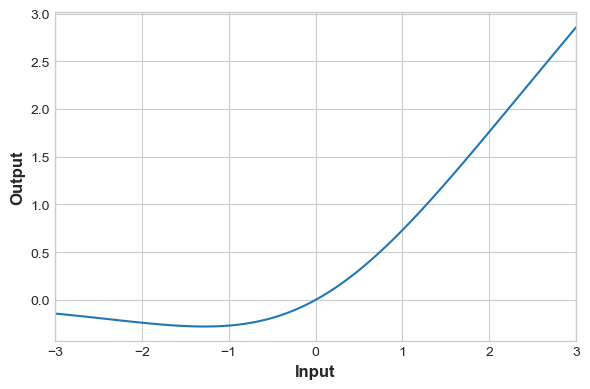

In [8]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Adding the Loss and Optimizer
After defining a model, you can add a loss function and optimizer with the model's compile method:

In [9]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [11]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99


In [12]:
print(X_train.shape)

(721, 8)


Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
3/3 [==============================] - 1s 170ms/step - loss: 0.2633 - val_loss: 0.2274
Epoch 2/10
3/3 [==============================] - 0s 27ms/step - loss: 0.2079 - val_loss: 0.1863
Epoch 3/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1718 - val_loss: 0.1636
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1561 - val_loss: 0.1532
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1520 - val_loss: 0.1517
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1525 - val_loss: 0.1508
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1502 - val_loss: 0.1468
Epoch 8/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1449 - val_loss: 0.1406
Epoch 9/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1380 - val_loss: 0.1346
Epoch 10/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1319 - val_loss: 0.1296


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

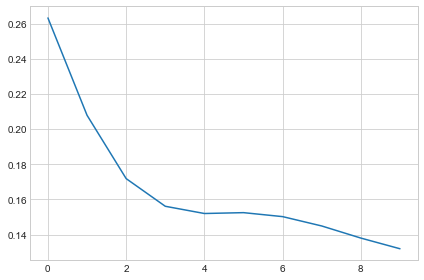

In [15]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Thank you
## Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">MUHAMMAD BILAL</a>